In [1]:
import quaternion
import numpy as np
import shapely
from shapely.geometry import Polygon

/Users/reona/workspace_local/randoor/.venv/lib/python2.7/site-packages/quaternion/numba_wrapper.py:20: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from numba, which means that some
parts of this code may run MUCH more slowly.  You
may wish to install numba.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


In [2]:
from randoor import geometric_utils

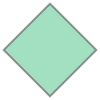

In [3]:
points = geometric_utils.get_square_horizon((0,0), 1, np.pi/4)
Polygon(points)

In [4]:
geometric_utils.add_dimension(np.arange(9).reshape((3,3)), 0)

array([[0, 1, 2, 0],
       [3, 4, 5, 0],
       [6, 7, 8, 0]])

In [5]:
from randoor import spawner

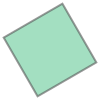

In [6]:
area_points = geometric_utils.get_square_horizon((0,0), 10, np.pi/6)
area_poly = Polygon(area_points)
area_poly

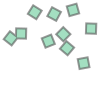

In [25]:
from shapely.ops import unary_union
polys = spawner.sprinkle_cube(area_poly, 10, 2)
mulp = unary_union(polys)
mulp

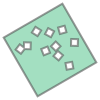

In [26]:
Polygon(area_points, [p.exterior.coords for p in mulp.geoms])